In [13]:
import os

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
dirpath = '/Users/oberrauch/work/master/working_directories/cmip6/per_glacier/RGI60-11/RGI60-11.00/RGI60-11.00897/'
fname = 'model_diagnosticsCESM2_ssp126.nc'
ds = xr.load_dataset(os.path.join(dirpath, fname))
ds

<xarray.Dataset>
Dimensions:         (time: 81)
Coordinates:
  * time            (time) float64 2.02e+03 2.021e+03 ... 2.099e+03 2.1e+03
    hydro_year      (time) int64 2020 2021 2022 2023 ... 2097 2098 2099 2100
    hydro_month     (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    calendar_year   (time) int64 2019 2020 2021 2022 ... 2096 2097 2098 2099
    calendar_month  (time) int64 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10
Data variables:
    volume_m3       (time) float64 3.802e+08 3.813e+08 ... 2.794e+06 2.094e+06
    area_m2         (time) float64 6.279e+06 6.175e+06 ... 2.264e+05 1.662e+05
    length_m        (time) float64 4.525e+03 4.49e+03 4.457e+03 ... 664.5 570.5
    ela_m           (time) float64 nan nan nan nan nan ... nan nan nan nan nan
    spec_mb         (time) float64 161.2 161.2 -646.9 ... -6.497e+03 -2.784e+03
    min_hgt         (time) float64 2.53e+03 2.539e+03 ... 3.521e+03 3.545e+03
    max_hgt         (time) float64 3.691e+03 3.691e+03 ... 3.691e+03 3.691e+03
    tau_l           (time) float64 1.0 15.05 15.34 15.39 ... 4.517 4.278 3.067
    tau_a           (time) float64 1.0 4.614 4.699 4.714 ... 2.246 2.205 1.572
Attributes:
    description:    VAS model output
    oggm_version:   1.0.1.dev529+gf71fe7d
    calendar:       365-day no leap
    creation_date:  2021-02-02 22:32:09
    hemisphere:     nh

In [201]:
import pandas as pd
import xarray as xr

In [204]:
path = '/Users/oberrauch/work/master/working_directories/ice-caps-old/run_output.nc'
ds_old = xr.load_dataset(path)
ds_old.coords['version'] = 'old'
path = '/Users/oberrauch/work/master/working_directories/ice-caps-new/run_output.nc'
ds_new = xr.load_dataset(path)
ds_new.coords['version'] = 'new'

ds = xr.concat([ds_old, ds_new], dim='version')

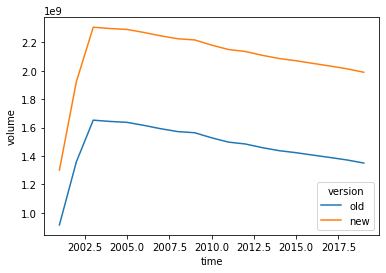

In [208]:
ds.volume.sum(dim='rgi_id').plot.line(x='time')

<xarray.Dataset>
Dimensions:         (rgi_id: 15, time: 19)
Coordinates:
  * time            (time) float64 2.001e+03 2.002e+03 ... 2.018e+03 2.019e+03
  * rgi_id          (rgi_id) object 'RGI60-15.00105' ... 'RGI60-15.02956'
    hydro_year      (time) int64 2001 2002 2003 2004 ... 2016 2017 2018 2019
    hydro_month     (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
    calendar_year   (time) int64 2000 2001 2002 2003 ... 2015 2016 2017 2018
    calendar_month  (time) int64 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10
Data variables:
    volume          (time, rgi_id) float32 54635990.0 149907330.0 ... 44633576.0
    area            (time, rgi_id) float32 1413000.0 2944000.0 ... 1347500.1
    length          (time, rgi_id) float32 1651.6172 2613.1038 ... 1621.8899
    ela             (time, rgi_id) float32 nan nan nan nan ... nan nan nan nan
    specb           (time, rgi_id) float32 -125.95208 -159.99191 ... -396.69003
    min_hgt         (time, rgi_id) float32 4971.0 4842.0 ... 6872.065 5307.83
    max_hgt         (time, rgi_id) float32 5713.0 5617.0 nan ... 7406.0 6129.0
    tau_l           (time, rgi_id) float32 1.0 1.0 nan ... 28.893576 42.70031
    tau_a           (time, rgi_id) float32 1.0 1.0 nan ... 14.936198 21.89793
    water_level     (rgi_id) float32 nan nan nan nan nan ... nan nan nan nan nan
    glen_a          (rgi_id) float32 nan nan nan nan nan ... nan nan nan nan nan
    fs              (rgi_id) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    description:    OGGM model output
    oggm_version:   1.0.1.dev529+gf71fe7d
    calendar:       365-day no leap
    creation_date:  2021-01-30 16:14:01

In [126]:
from oggm import utils
import geopandas as gpd

In [150]:
def scale_volume(area, SI=True):
    """Compute volume using the following area/volume scaling:
    	V = c_a * A^gamma
    If SI is True, the area is supplied in squared meters [m2],
    and in squared kilometers otherwise [km2]."""
    if SI:
        # scaling constant for area in m2
        ca = 0.1912
    else:
        # scaling constant for area in km2
        ca = 0.034
    # scaling exponent
    gamma = 1.375
    # compute volume by scaling law
    return ca * area ** gamma

In [194]:
def scale_volume_icecap(area, SI=True):
    """Compute volume using the following area/volume scaling:
    	V = c_a * A^gamma
    If SI is True, the area is supplied in squared meters [m2],
    and in squared kilometers otherwise [km2]."""
    if SI:
        # scaling constant for area in m2
        ca = .01701
    else:
        # scaling constant for area in km2
        ca = 0.0538
    # scaling exponent
    gamma = 1.25
    # compute volume by scaling law
    return ca * area ** gamma

In [195]:
import numpy as np

In [196]:
# area and volume in km2 and km3, respectively
area_km2 = 8.036
volume_km3 = scale_volume_icecap(area_km2, SI=False)
print('Area of {:.4} km2 corresponds a volume of {:.4} km3'.format(area_km2, volume_km3))

# area and volume in m2 and m3, respectively
area_m2 = 8036000.0
volume_m3 = scale_volume_icecap(area_m2)
print('Area of {:.4} m2 corresponds a volume of {:.4} m3'.format(area_m2, volume_m3))

np.testing.assert_allclose(volume_km3, volume_m3*1e-9)

Area of 8.036 km2 corresponds a volume of 0.7279 km3
Area of 8.036e+06 m2 corresponds a volume of 7.278e+06 m3


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 1 / 1 (100%)
Max absolute difference: 0.72063967
Max relative difference: 99.01795304
 x: array(0.727918)
 y: array(0.007278)

In [160]:
# area and volume in km2 and km3, respectively
area_km2 = 8.036
volume_km3 = scale_volume_icecap(area_km2, SI=False)
print('Area of {:.4} km2 corresponds a volume of {:.4} km3'.format(area_km2, volume_km3))

# area and volume in m2 and m3, respectively
area_m2 = 8036000.0
volume_m3 = scale_volume_icecap(area_m2)
print('Area of {:.4} m2 corresponds a volume of {:.4} m3'.format(area_m2, volume_m3))

np.testing.assert_allclose(volume_km3, volume_m3*1e-9)

Area of 8.036 km2 corresponds a volume of 0.7279 km3
Area of 8.036e+06 m2 corresponds a volume of 7.278e+06 m3


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 1 / 1 (100%)
Max absolute difference: 0.72063967
Max relative difference: 99.01795304
 x: array(0.727918)
 y: array(0.007278)

In [172]:
def scale_volume_length(length, SI=True):
    """Compute volume using the following volume/length scaling: V = c_a * A^gamma
    If SI is True, the lengt is supplied in meters [m],
    and in kilometers otherwise [km2]."""
    if SI:
        # scaling constant for area in m2
        cl = 4.521
    else:
        # scaling constant for area in km2
        cl = 0.0180
    # scaling exponent
    gamma = 2.2
    # compute volume by scaling law
    return cl * length ** gamma

In [167]:
0.0180*7.178**2.2

1.3755617909488689

In [169]:
(1.37556179094886891e9)/(7.178*1e3)**2.2

4.5213955767172385

In [184]:
def scale_volume_length(length, SI=True):
    """Compute volume using the following volume/length scaling: V = c_a * A^gamma
    If SI is True, the lengt is supplied in meters [m],
    and in kilometers otherwise [km2]."""
    if SI:
        # scaling constant for area in m2
        cl = 7.121
    else:
        # scaling constant for area in km2
        cl = 0.2252
    # scaling exponent
    q = 2.5
    # compute volume by scaling law
    return cl * length ** q

In [185]:
# area and volume in km2 and km3, respectively
length_km = 7.178
volume_km3 = scale_volume_length(length_km, SI=False)
print('Length of {:.4} km corresponds a volume of {:.4} km3'.format(length_km, volume_km3))

# area and volume in m2 and m3, respectively
length_m = 7178.
volume_m3 = scale_volume_length(length_m)
print('Length of {:.4} m corresponds a volume of {:.4} m3'.format(length_m, volume_m3))

np.testing.assert_allclose(volume_km3, volume_m3*1e-9)

Length of 7.178 km corresponds a volume of 31.09 km3
Length of 7.178e+03 m corresponds a volume of 3.108e+10 m3


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 1 / 1 (100%)
Max absolute difference: 0.00196126
Max relative difference: 6.30937648e-05
 x: array(31.086872)
 y: array(31.08491)

In [163]:
utils.get_rgi_glacier_entities(['RGI60-11.00897'])

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
896,RGI60-11.00897,G010758E46800N,20030799,20030999,10.7584,46.8003,11,1,8.036,2430,...,71,7178,0,0,0,0,9,1,Hintereisferner,"POLYGON ((10.75085 46.81381, 10.75112 46.81397..."


In [138]:
for reg in ['11', '13', '14', '15']:
    tmp = gpd.read_file(utils.get_rgi_region_file(reg, '62'))
    n_icecaps = (tmp.Form == 1).sum()
    n_nonglaciers = (tmp.Form == 1).sum()
    print(f'RGI region {reg}\nNumber of ice caps: {n_icecaps}\nNumber of non glaciers: {n_nonglaciers}')

RGI region 11
Number of ice caps: 0
Number of non glaciers: 0
RGI region 13
Number of ice caps: 1545
Number of non glaciers: 1545
RGI region 14
Number of ice caps: 295
Number of non glaciers: 295
RGI region 15
Number of ice caps: 289
Number of non glaciers: 289


In [200]:
tmp[tmp.Form == 1].RGIId.values

array(['RGI60-15.00105', 'RGI60-15.00107', 'RGI60-15.00194',
       'RGI60-15.01653', 'RGI60-15.01654', 'RGI60-15.01658',
       'RGI60-15.02072', 'RGI60-15.02380', 'RGI60-15.02710',
       'RGI60-15.02817', 'RGI60-15.02841', 'RGI60-15.02842',
       'RGI60-15.02864', 'RGI60-15.02909', 'RGI60-15.02956',
       'RGI60-15.03030', 'RGI60-15.03053', 'RGI60-15.03056',
       'RGI60-15.03109', 'RGI60-15.03211', 'RGI60-15.03273',
       'RGI60-15.03276', 'RGI60-15.03337', 'RGI60-15.03404',
       'RGI60-15.03586', 'RGI60-15.03591', 'RGI60-15.03592',
       'RGI60-15.03613', 'RGI60-15.03722', 'RGI60-15.03729',
       'RGI60-15.03967', 'RGI60-15.04154', 'RGI60-15.04163',
       'RGI60-15.04278', 'RGI60-15.04338', 'RGI60-15.04584',
       'RGI60-15.04590', 'RGI60-15.04629', 'RGI60-15.04630',
       'RGI60-15.04659', 'RGI60-15.04760', 'RGI60-15.04855',
       'RGI60-15.04863', 'RGI60-15.04866', 'RGI60-15.04996',
       'RGI60-15.05121', 'RGI60-15.05515', 'RGI60-15.05538',
       'RGI60-15.07062',

In [136]:
(tmp.Form != 0).sum()

289

In [119]:
rgi_ids = ['RGI60-11.03235', 'RGI60-11.03237']
tmp = utils.get_rgi_glacier_entities(rgi_ids, '62')

In [121]:
tmp.

3234    0
3236    0
Name: Form, dtype: int64

In [92]:
import os
import sys
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
dirpath = '/Users/oberrauch/work/master/data/cmip6_output/RGI11/CESM2'
ds = list()
for f in os.listdir(dirpath):
    ds_ = xr.load_dataset(os.path.join(dirpath, f))
    ds_.coords['ssp'] = f
    ds.append(ds_)

In [94]:
ds = xr.concat(ds, dim='ssp')
ds

<xarray.Dataset>
Dimensions:         (rgi_id: 3927, ssp: 4, time: 81)
Coordinates:
  * time            (time) float64 2.02e+03 2.021e+03 ... 2.099e+03 2.1e+03
  * rgi_id          (rgi_id) object 'RGI60-11.00001' ... 'RGI60-11.03927'
    hydro_year      (time) int64 2020 2021 2022 2023 ... 2097 2098 2099 2100
    hydro_month     (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    calendar_year   (time) int64 2019 2020 2021 2022 ... 2096 2097 2098 2099
    calendar_month  (time) int64 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10
  * ssp             (ssp) object 'CESM2_ssp126.nc' ... 'CESM2_ssp585.nc'
Data variables:
    volume          (ssp, time, rgi_id) float32 1882687.0 106249880.0 ... nan
    area            (ssp, time, rgi_id) float32 122000.0 2292000.0 ... nan nan
    length          (ssp, time, rgi_id) float32 357.3102 2234.625 ... nan nan
    ela             (ssp, time, rgi_id) float32 nan nan nan nan ... nan nan nan
    specb           (ssp, time, rgi_id) float32 -941.1609 -1317.2708 ... nan nan
    min_hgt         (ssp, time, rgi_id) float32 2190.0 2209.0 2274.0 ... nan nan
    max_hgt         (ssp, time, rgi_id) float32 2390.0 2854.0 ... 2209.0 1918.0
    tau_l           (ssp, time, rgi_id) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    tau_a           (ssp, time, rgi_id) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    water_level     (ssp, rgi_id) float32 nan nan nan nan ... nan nan nan nan
    glen_a          (ssp, rgi_id) float32 nan nan nan nan ... nan nan nan nan
    fs              (ssp, rgi_id) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    description:    OGGM model output
    oggm_version:   1.3.2.dev140+gc37ba50
    calendar:       365-day no leap
    creation_date:  2021-01-28 15:47:45

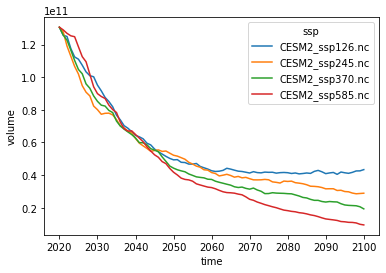

In [87]:
ds.volume.sum(dim='rgi_id').plot.line(hue='ssp')

In [115]:
tmp = ds.isel(time=0).volume.stack(x=['ssp', 'rgi_id'])
tmp[xr.ufuncs.isnan(tmp)]

<xarray.DataArray 'volume' (x: 8)>
array([nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)
Coordinates:
    time            float64 2.02e+03
    hydro_year      int64 2020
    hydro_month     int64 1
    calendar_year   int64 2019
    calendar_month  int64 10
  * x               (x) MultiIndex
  - ssp             (x) object 'CESM2_ssp126.nc' ... 'CESM2_ssp585.nc'
  - rgi_id          (x) object 'RGI60-11.03235' ... 'RGI60-11.03237'
Attributes:
    description:  Total glacier volume
    unit:         m 3

In [88]:
dirpath = '/Users/oberrauch/work/master/data/cmip6_data/RGI11/CESM2'
f = 'CESM2_ssp126.nc'
ds = xr.load_dataset(os.path.join(dirpath, f))

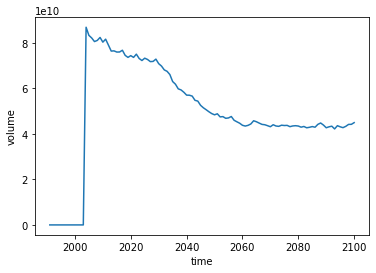

In [91]:
ds.volume.sum(dim='rgi_id').plot()

In [75]:
np.sum([np.isfinite(ds_.sel(rgi_id=rid).length.values).any() for rid in ds_.rgi_id.values])

1972

In [67]:
from oggm import utils
import geopandas as gpd

In [71]:
rgi_ids = gpd.read_file(
        utils.get_rgi_region_file('11', version='62'))

In [72]:
rgi_ids

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,check_geom,geometry
0,RGI60-11.00001,G013599E47495N,20030799,20030999,13.5987,47.4949,11,1,0.122,2191,...,461,0,0,0,0,9,9,None,None,"POLYGON ((13.60035 47.49330, 13.59995 47.49332..."
1,RGI60-11.00002,G013614E47485N,20030799,20030999,13.6135,47.4845,11,1,2.292,2203,...,1853,0,0,0,0,9,9,None,None,"POLYGON ((13.60638 47.47578, 13.60599 47.47579..."
2,RGI60-11.00003,G013596E47484N,20030799,20030999,13.5960,47.4835,11,1,0.851,2280,...,1140,0,0,0,0,9,9,None,None,"POLYGON ((13.59765 47.47613, 13.59726 47.47614..."
3,RGI60-11.00004,G013583E47481N,20030799,20030999,13.5829,47.4807,11,1,0.053,2319,...,382,0,0,0,0,9,9,None,None,"POLYGON ((13.58283 47.47969, 13.58243 47.47971..."
4,RGI60-11.00005,G013603E47477N,20030799,20030999,13.6026,47.4774,11,1,0.057,2656,...,202,0,0,0,0,9,9,None,None,"POLYGON ((13.60076 47.47519, 13.60036 47.47521..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,RGI60-11.03923,G013444E46362N,20120999,-9999999,13.4440,46.3620,11,1,0.035,2257,...,202,0,0,0,0,0,9,Canin Ovest IT4L00003004,None,"POLYGON ((13.44285 46.36257, 13.44293 46.36257..."
3923,RGI60-11.03924,G013444E46437N,20120999,-9999999,13.4440,46.4370,11,1,0.037,1847,...,160,0,0,0,0,0,9,Montasio Est IT4L00003001,None,"POLYGON ((13.44437 46.43624, 13.44404 46.43624..."
3924,RGI60-11.03925,G013448E46365N,20120999,-9999999,13.4480,46.3650,11,1,0.010,2195,...,100,0,0,0,0,0,9,Canin Est I,None,"POLYGON ((13.44764 46.36464, 13.44761 46.36465..."
3925,RGI60-11.03926,G013451E46366N,20120999,-9999999,13.4510,46.3660,11,1,0.013,2156,...,190,0,0,0,0,0,9,Canin Est IT4L00003002,None,"POLYGON ((13.44990 46.36638, 13.44989 46.36644..."
